In [1]:
# {r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Loading Data

In [10]:
## Loading my data
# Simply read the data and transform relevant variables to factors datatype.
df = read_csv('run_table.csv')
df$problem = as.factor(df$problem)
df$prompts = as.factor(df$prompts)
df$run_number = as.factor(df$run_number)

Rows: 36 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): __run_id, __done, run_number, problem, prompts
dbl (2): energy_consumption, execution_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
head(df)

__run_id,__done,run_number,problem,prompts,energy_consumption,execution_time
<chr>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>
run_0_repetition_0,DONE,r1,O_n2_problem,human,5.536,0.009056
run_1_repetition_0,DONE,r1,O_n2_problem,base_prompt,7.389,0.020201
run_2_repetition_0,DONE,r1,O_n2_problem,few_shot_prompt,4.644,0.022137
run_3_repetition_0,DONE,r1,O_n2_problem,guided_prompt,4.920,0.021532
run_4_repetition_0,DONE,r1,O_n_problem,human,5.023,0.023125
run_5_repetition_0,DONE,r1,O_n_problem,base_prompt,4.704,0.021473


In [12]:
summary(df)

   __run_id            __done          run_number            problem  
 Length:36          Length:36          r1:12      O_n_problem    :12  
 Class :character   Class :character   r2:12      O_n2_problem   :12  
 Mode  :character   Mode  :character   r3:12      O_nlogn_problem:12  
                                                                      
                                                                      
                                                                      
            prompts  energy_consumption execution_time    
 base_prompt    :9   Min.   :4.595      Min.   :0.009056  
 few_shot_prompt:9   1st Qu.:4.803      1st Qu.:0.019983  
 guided_prompt  :9   Median :4.907      Median :0.021026  
 human          :9   Mean   :5.055      Mean   :0.020719  
                     3rd Qu.:5.160      3rd Qu.:0.021731  
                     Max.   :7.389      Max.   :0.023681  

## Plotting the historgram and checking normality of data
1. visual inspection with histogram and Q-Q
2. statistical testing with Shapiro-Wilk Test  

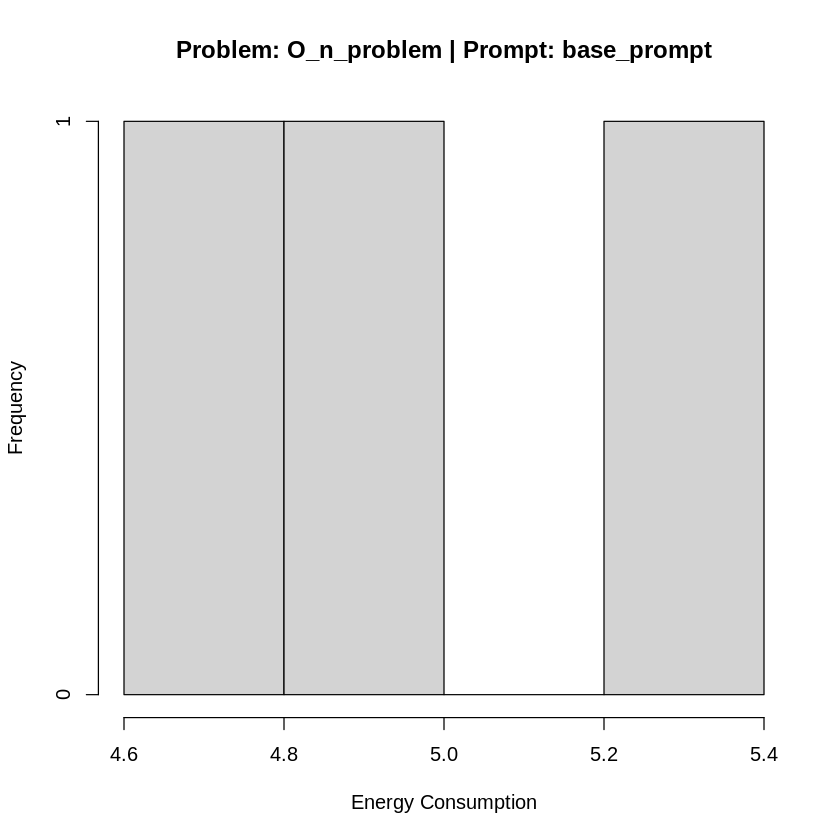

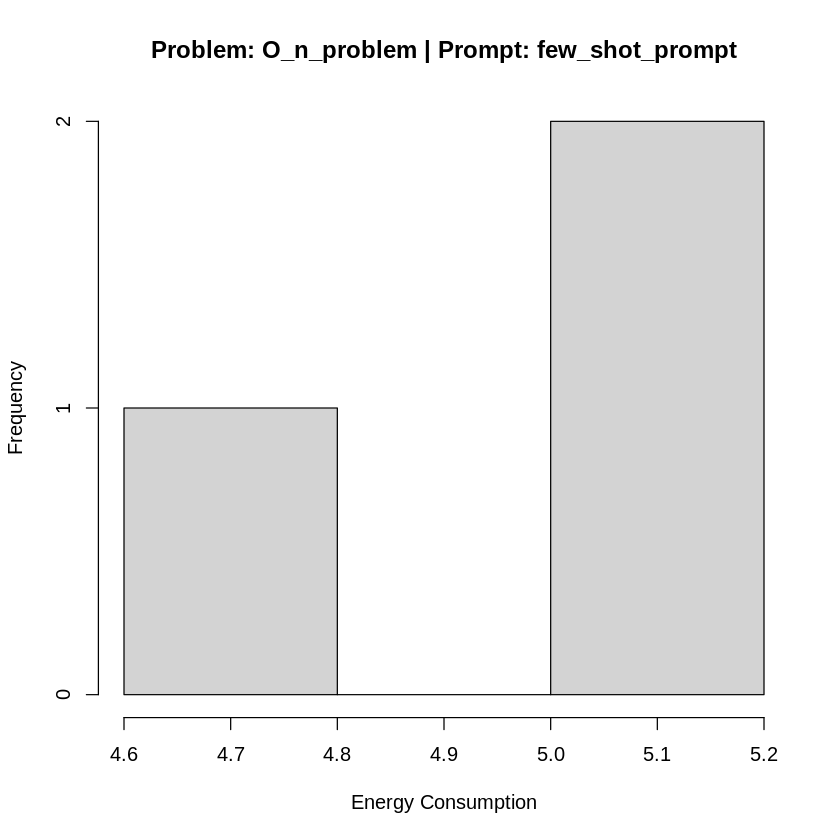

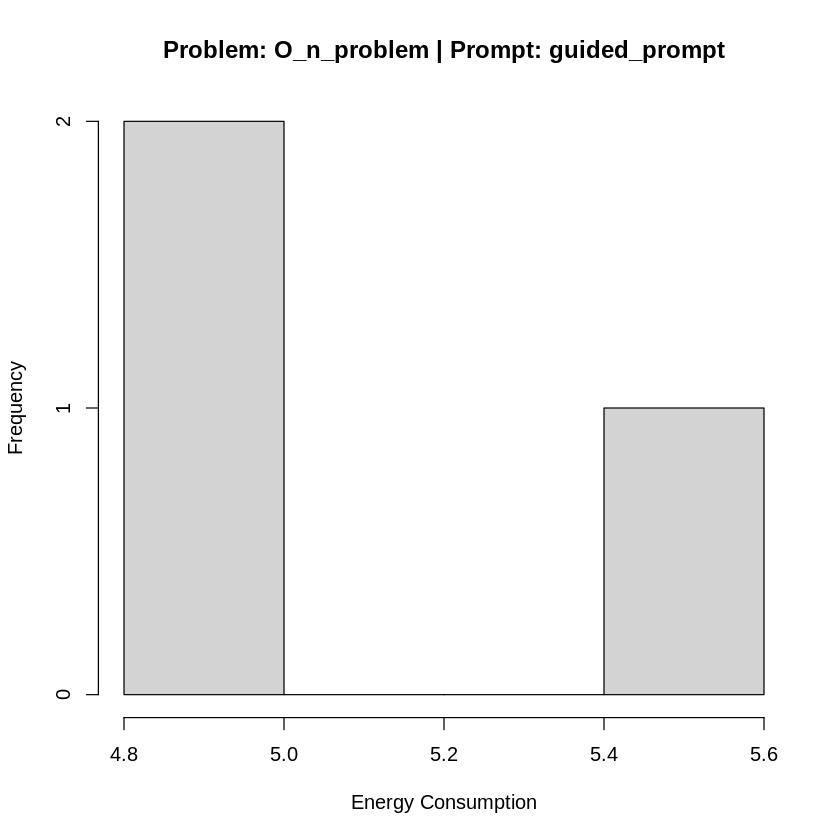

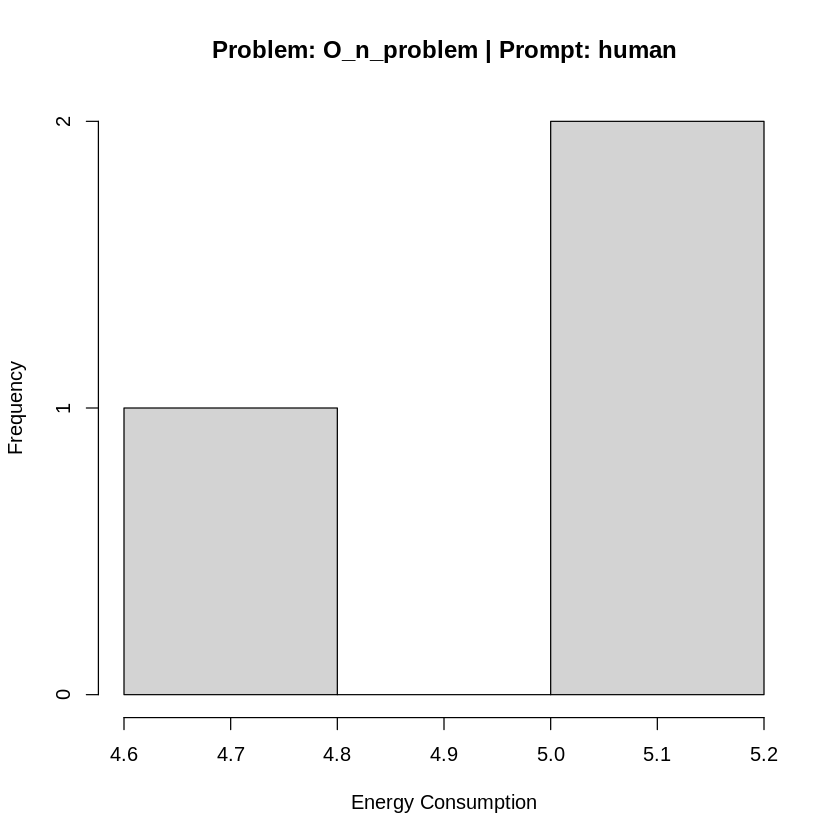

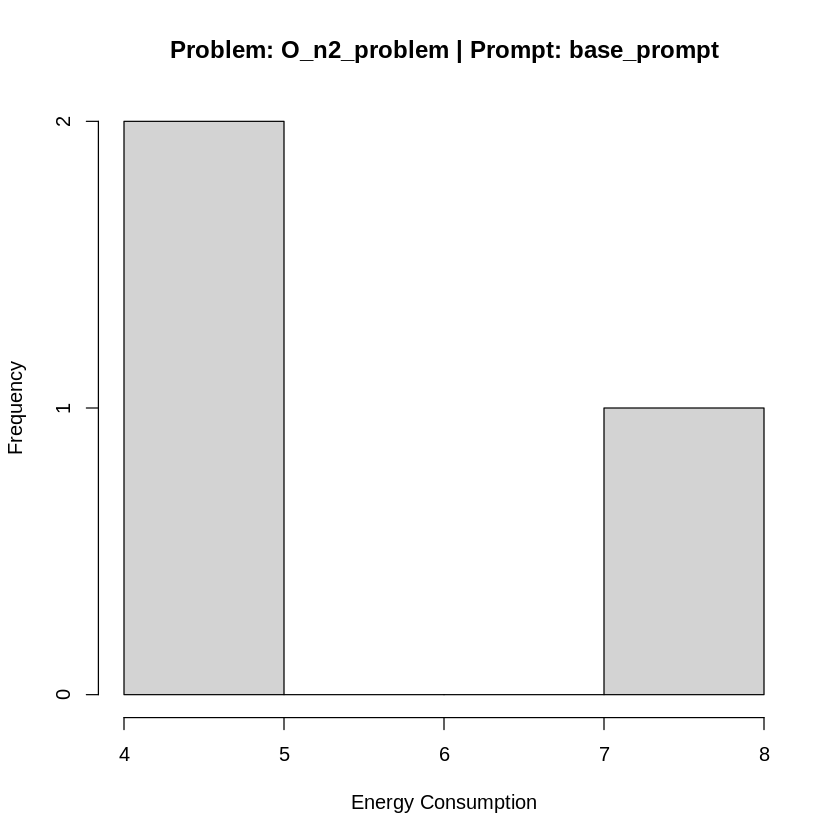

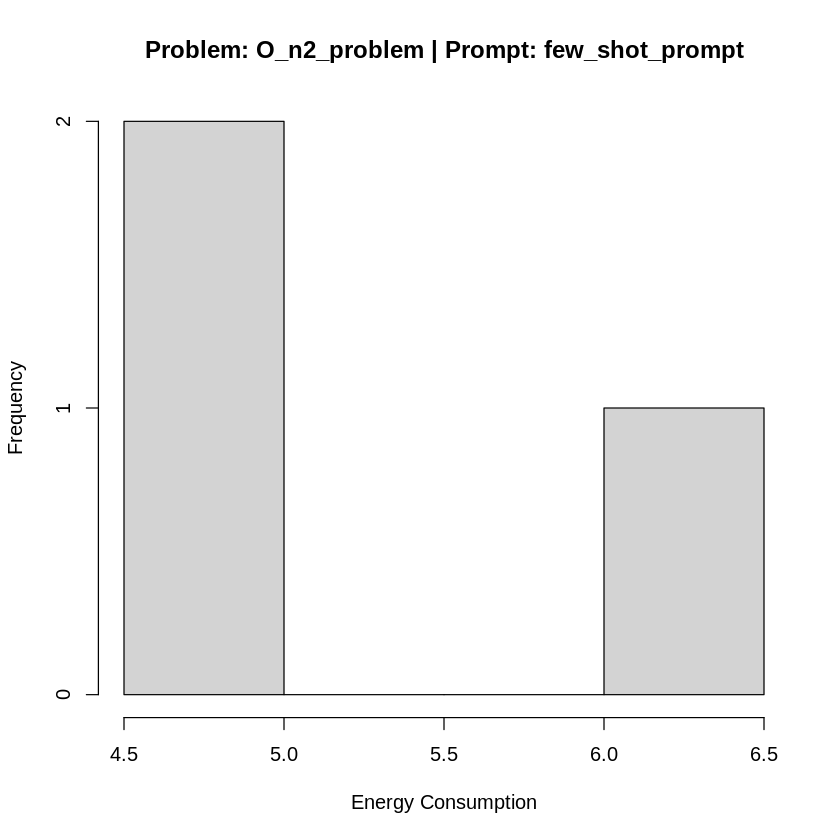

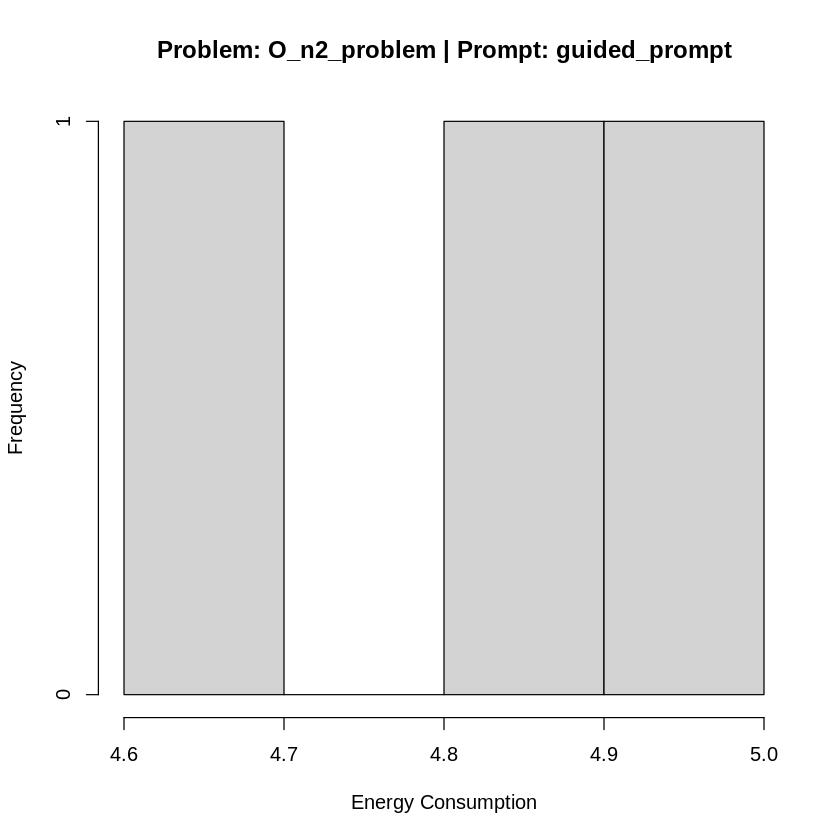

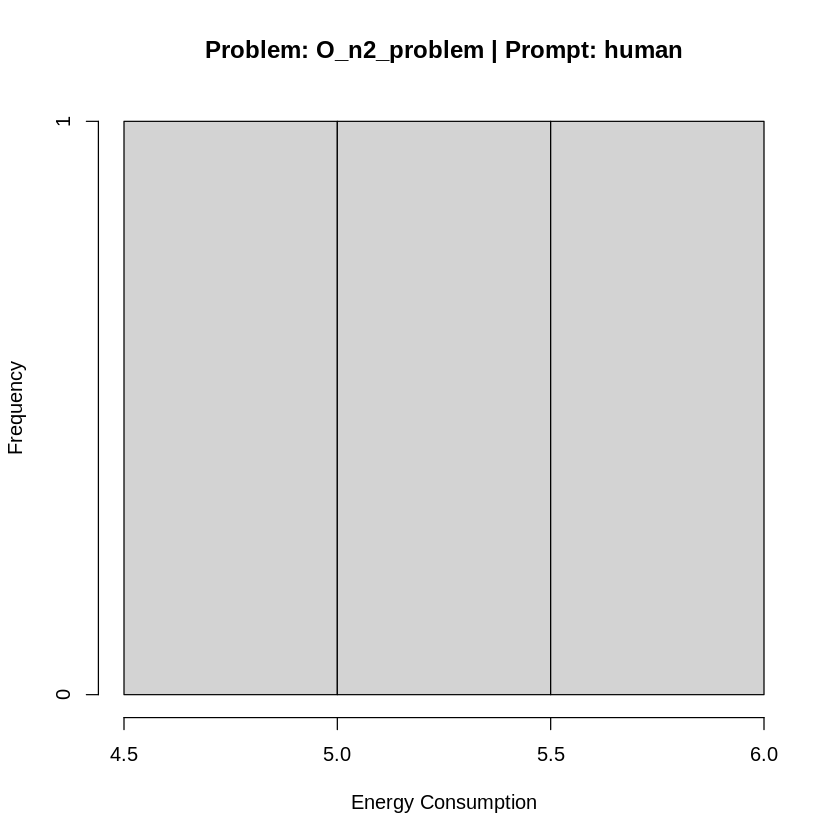

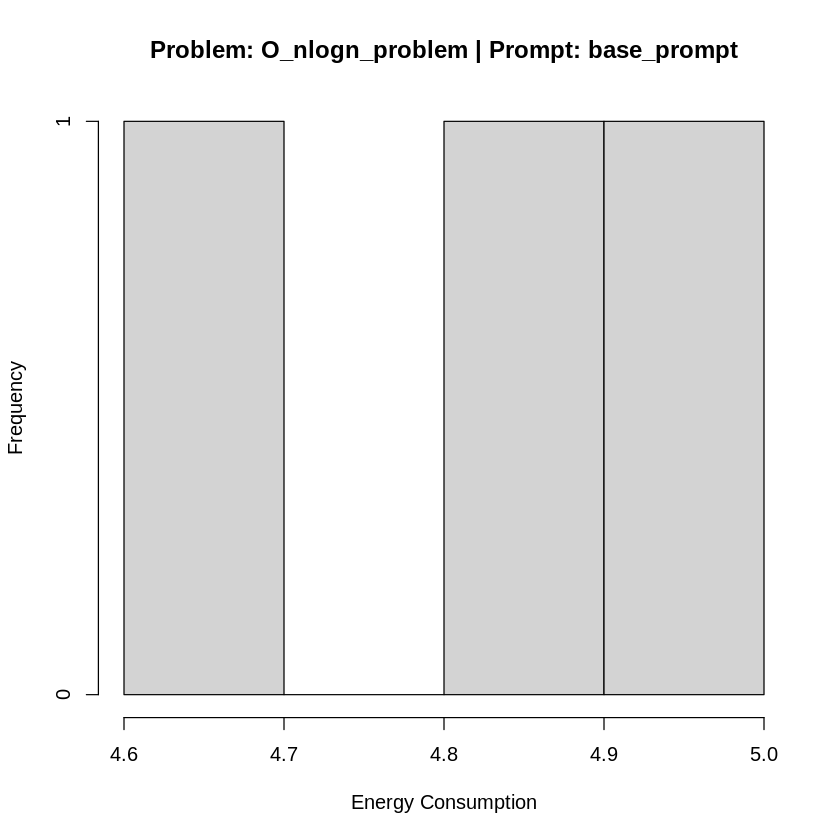

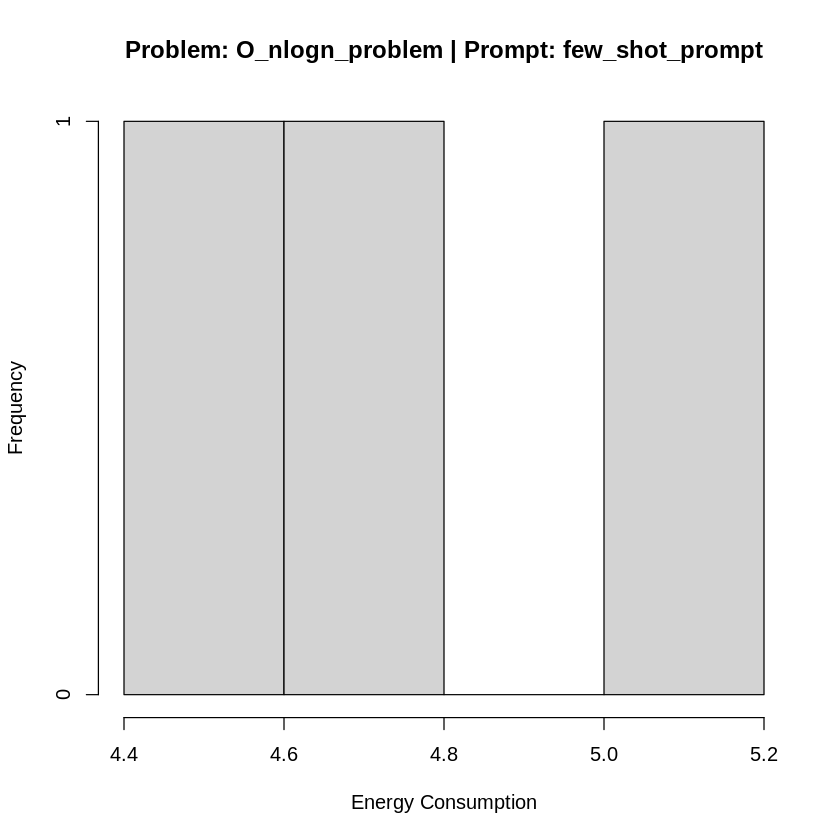

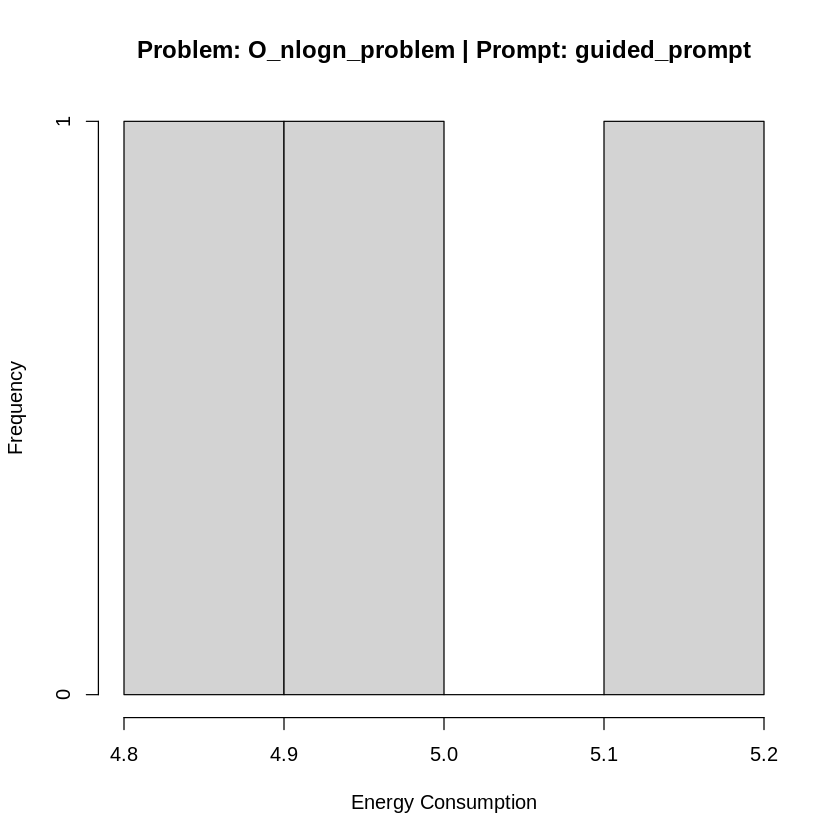

[[1]]
$breaks
[1] 4.6 4.8 5.0 5.2 5.4

$counts
[1] 1 1 0 1

$density
[1] 1.666667 1.666667 0.000000 1.666667

$mids
[1] 4.7 4.9 5.1 5.3

$xname
[1] "group_data$energy_consumption"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[2]]
$breaks
[1] 4.6 4.8 5.0 5.2

$counts
[1] 1 0 2

$density
[1] 1.666667 0.000000 3.333333

$mids
[1] 4.7 4.9 5.1

$xname
[1] "group_data$energy_consumption"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[3]]
$breaks
[1] 4.8 5.0 5.2 5.4 5.6

$counts
[1] 2 0 0 1

$density
[1] 3.333333 0.000000 0.000000 1.666667

$mids
[1] 4.9 5.1 5.3 5.5

$xname
[1] "group_data$energy_consumption"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[4]]
$breaks
[1] 4.6 4.8 5.0 5.2

$counts
[1] 1 0 2

$density
[1] 1.666667 0.000000 3.333333

$mids
[1] 4.7 4.9 5.1

$xname
[1] "group_data$energy_consumption"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[5]]
$breaks
[1] 4 5 6 7 8

$counts
[1] 2 0 0 1

$density
[1] 0.6666667 0.0000000 0.0000000 0.3333333

$m

`summarise()` has grouped output by 'problem'. You can override using the
`.groups` argument.


problem,prompts,n,stest
<fct>,<fct>,<int>,<dbl>
O_n_problem,base_prompt,3,0.58863263
O_n_problem,few_shot_prompt,3,0.25929648
O_n_problem,guided_prompt,3,0.08570470
O_n_problem,human,3,0.20825253
O_n2_problem,base_prompt,3,0.03191093
O_n2_problem,few_shot_prompt,3,0.27153192
O_n2_problem,guided_prompt,3,0.15154420
O_n2_problem,human,3,0.85577066
O_nlogn_problem,base_prompt,3,0.82928541


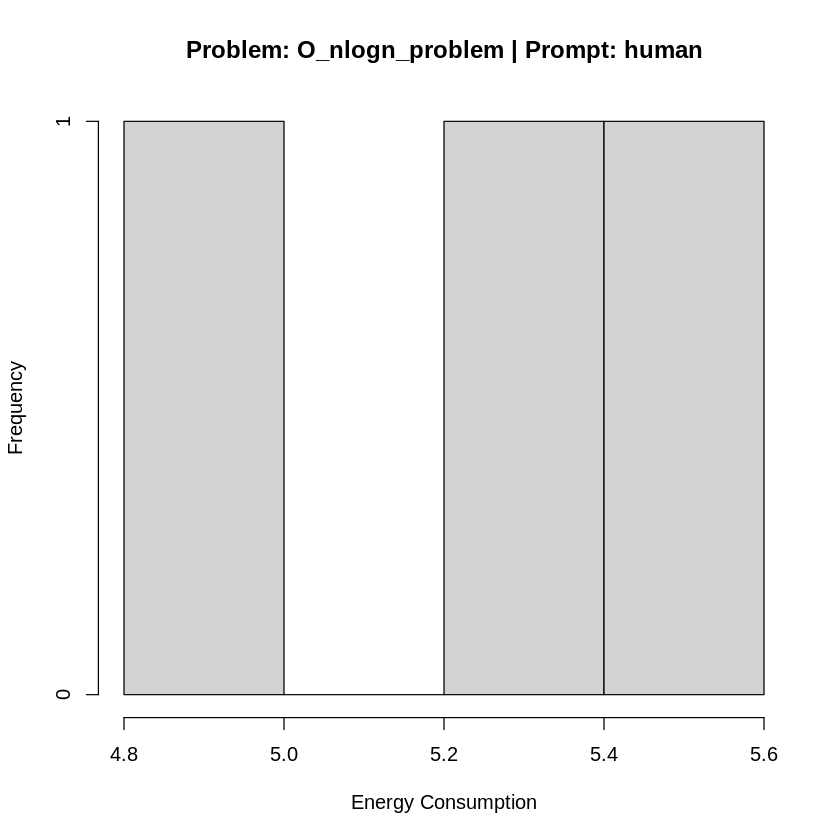

In [17]:
## Plotting
# We can utilize dplyr package and group_by feature to run all of the setups at once,
# with the use of pipe operator (%>%)

df %>%
  group_by(problem, prompts) %>%
  group_split() %>%
  lapply(function(group_data) {
    hist(group_data$energy_consumption,
         main = paste("Problem:", unique(group_data$problem),
                      "| Prompt:", unique(group_data$prompts)),
         xlab = "Energy Consumption")
  })

df %>%
  group_by(problem, prompts) %>%
  summarize(n = n(),
            stest = shapiro.test(energy_consumption)$p.value)

In [18]:
install.packages("bestNormalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘RcppParallel’, ‘plyr’, ‘prodlim’, ‘lamW’, ‘reshape2’, ‘iterators’, ‘rngtools’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘lobstr’, ‘LambertW’, ‘nortest’, ‘doParallel’, ‘foreach’, ‘doRNG’, ‘recipes’, ‘butcher’




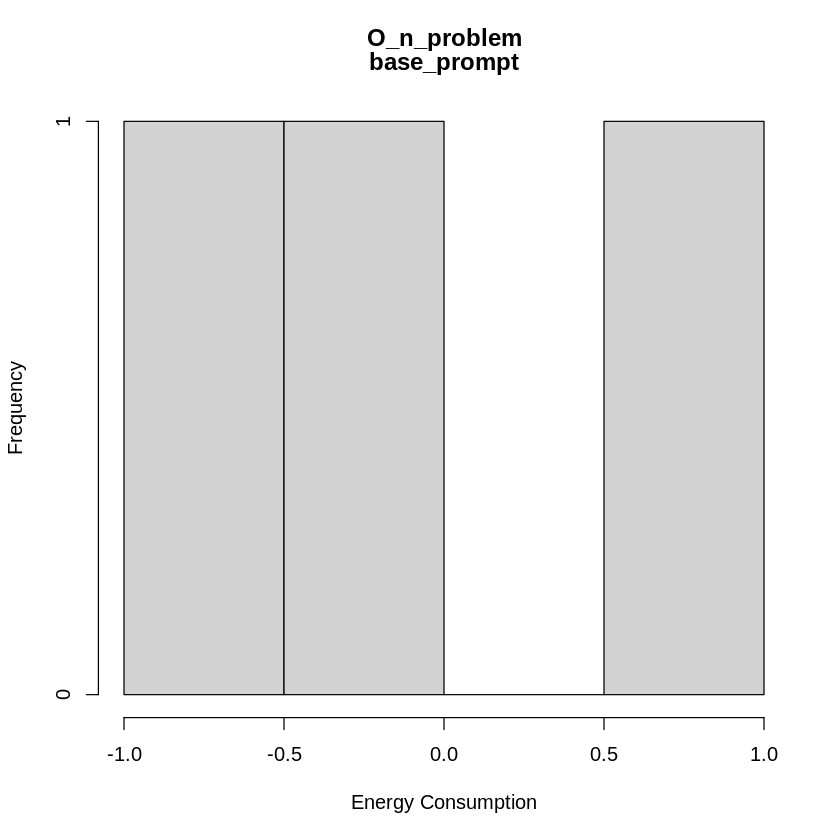

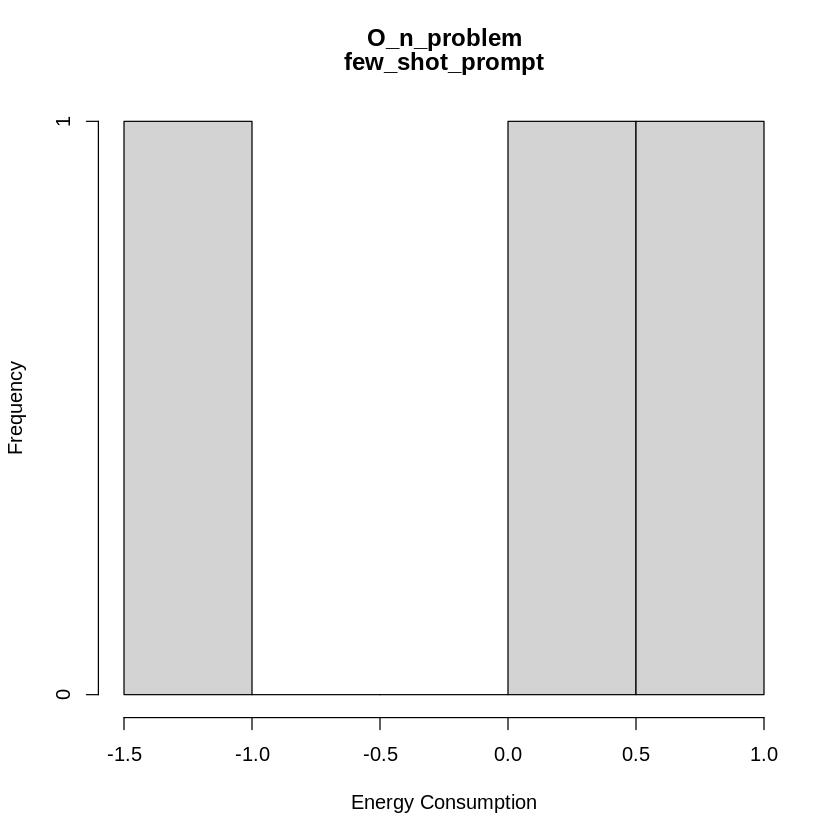

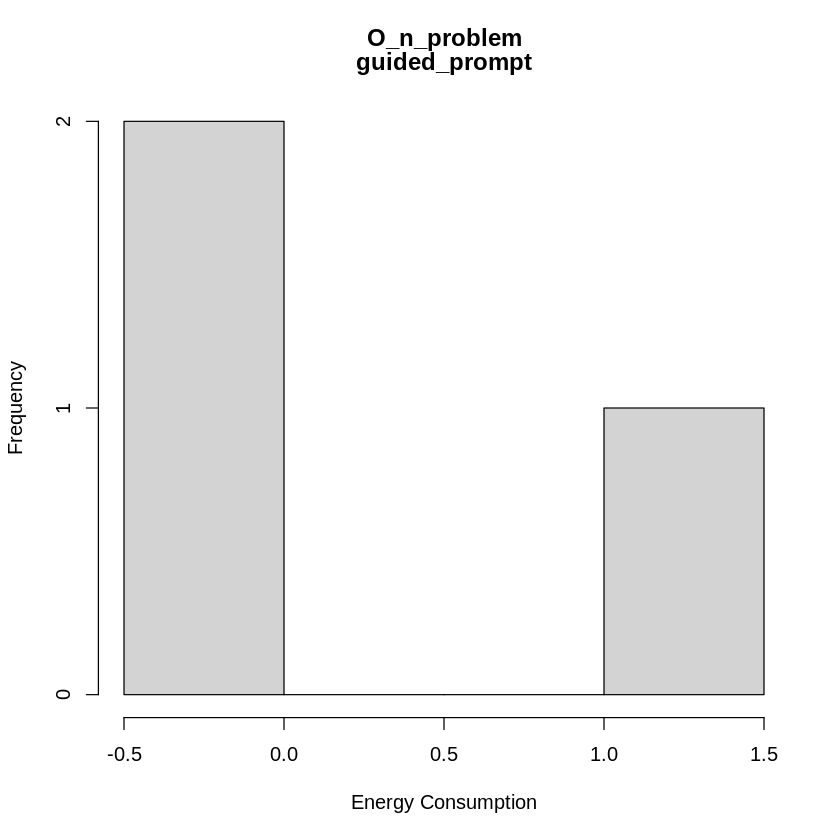

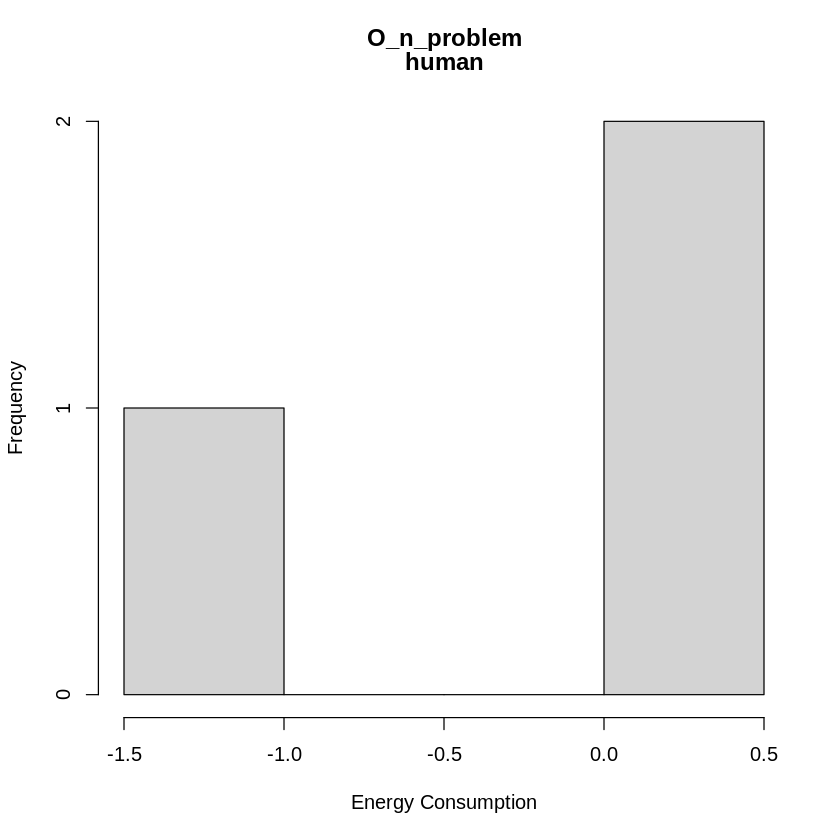

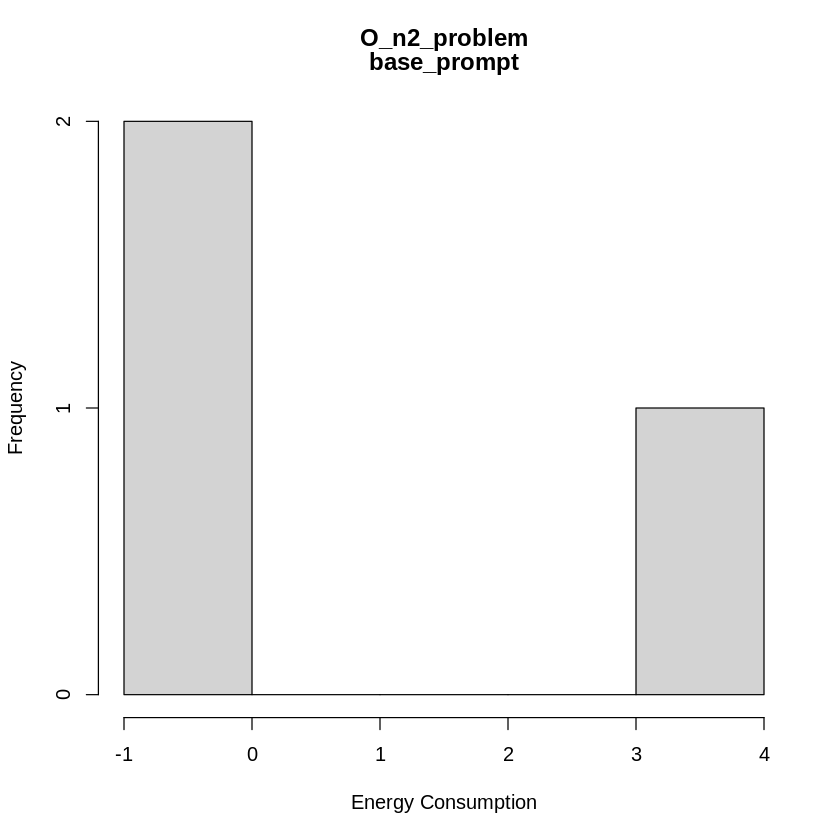

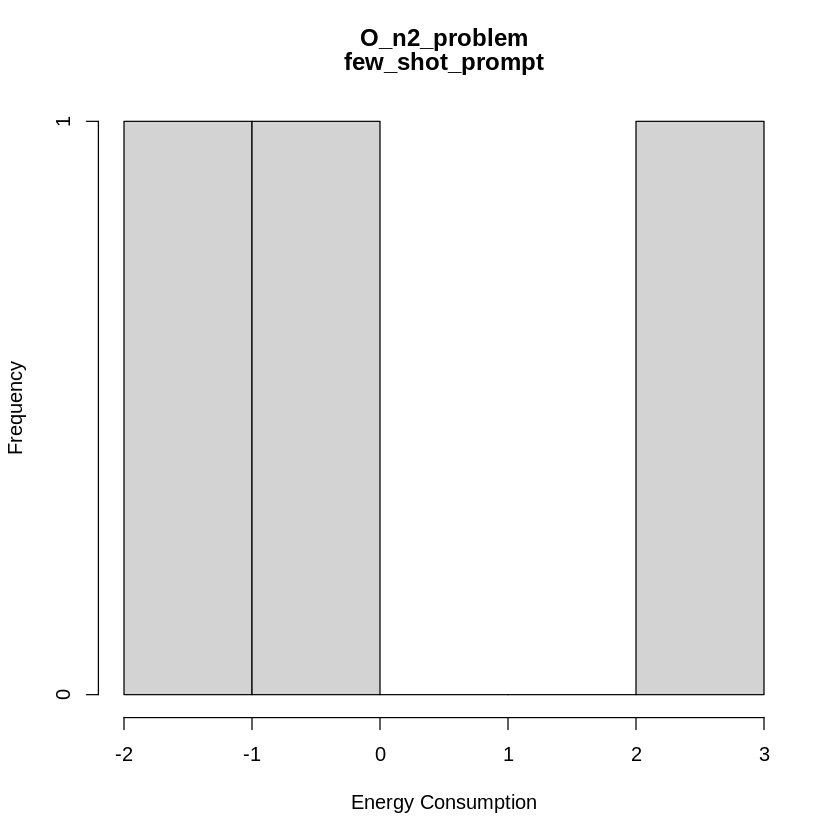

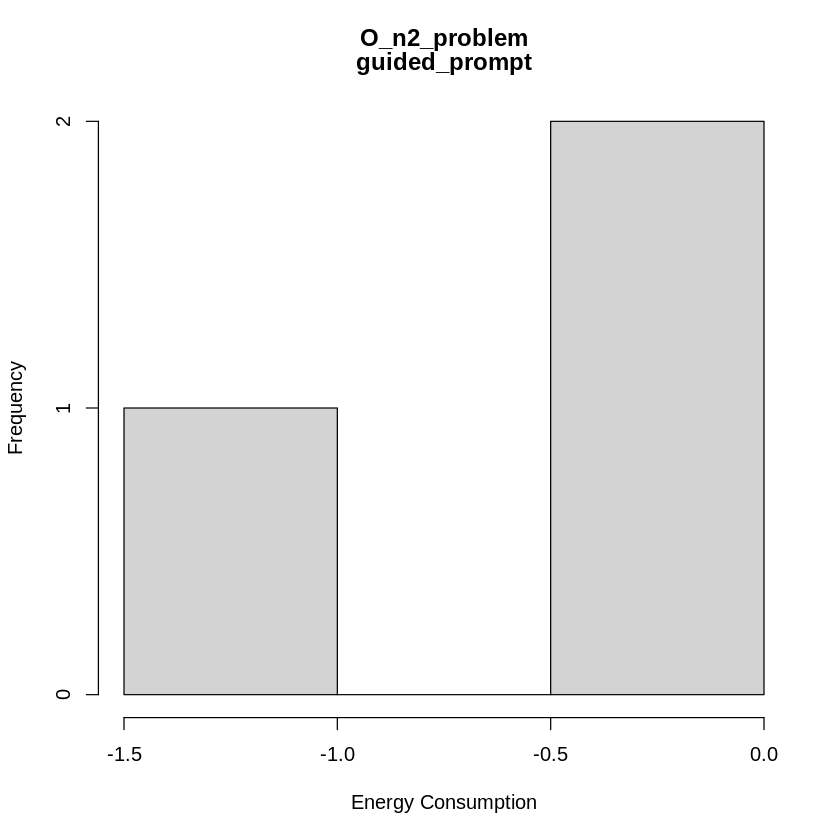

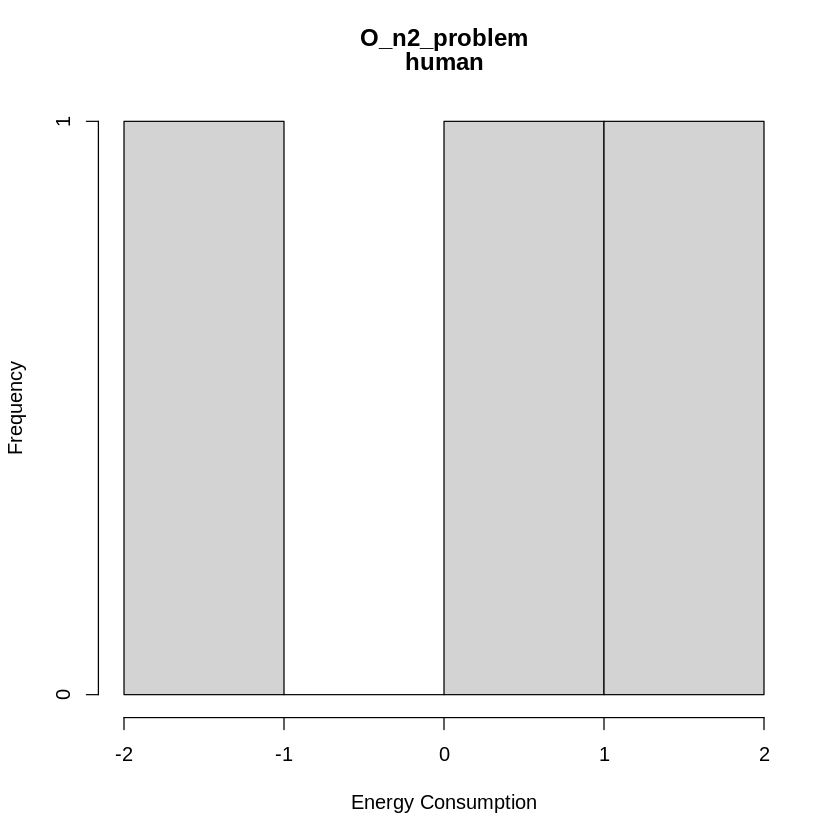

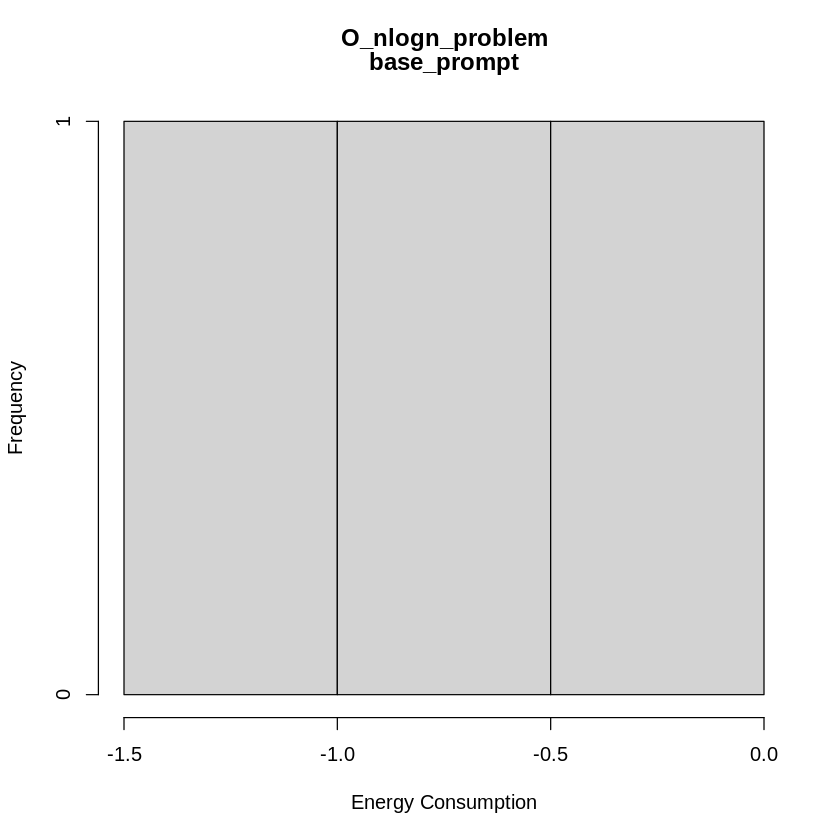

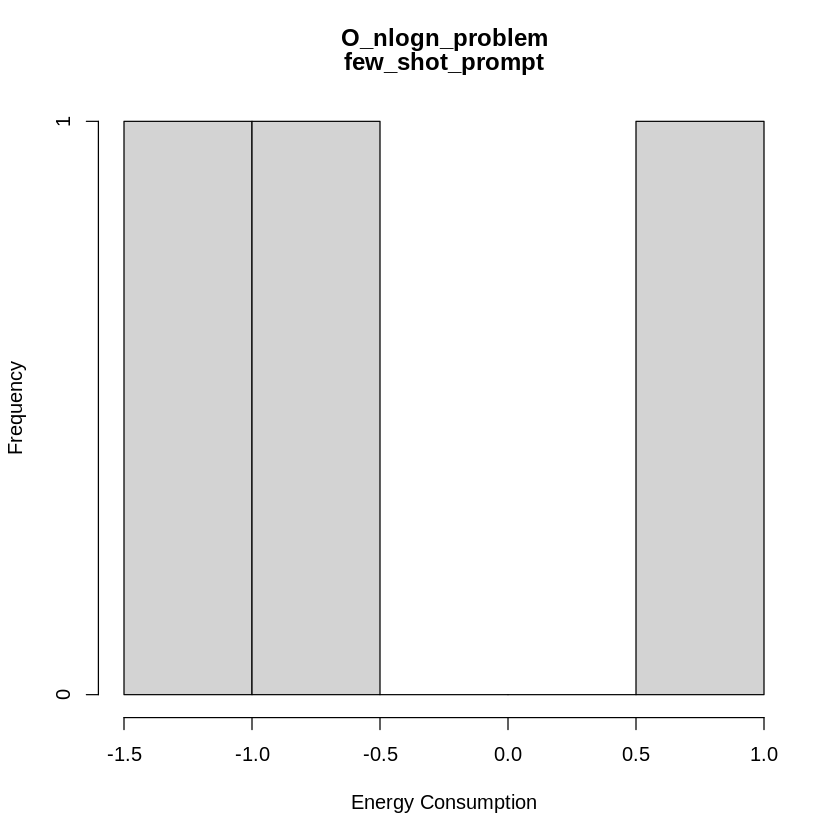

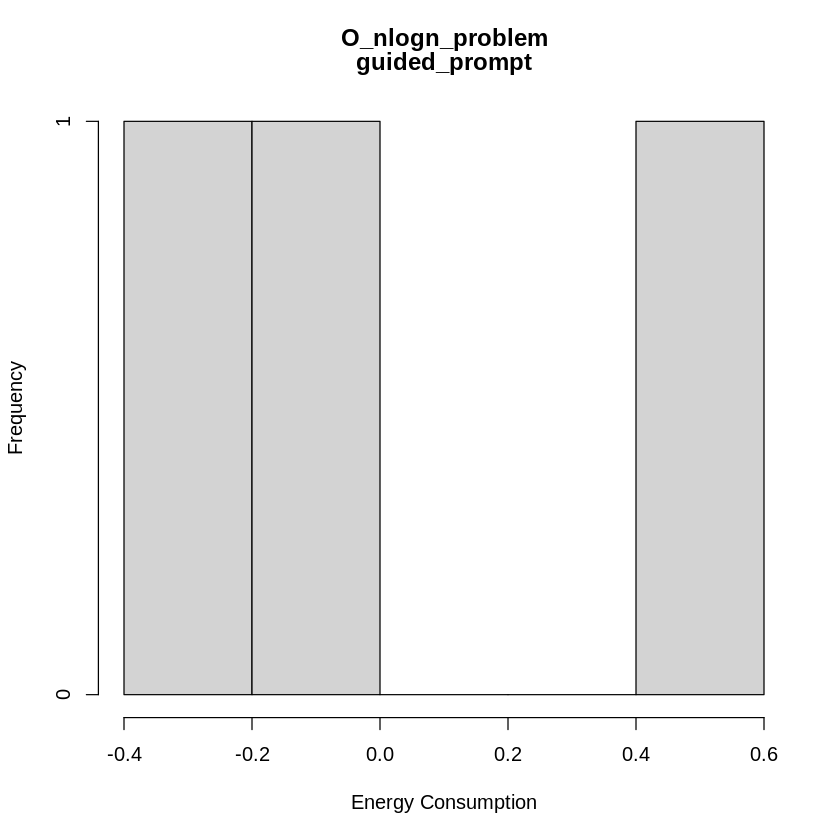

[[1]]
$breaks
[1] -1.0 -0.5  0.0  0.5  1.0

$counts
[1] 1 1 0 1

$density
[1] 0.6666667 0.6666667 0.0000000 0.6666667

$mids
[1] -0.75 -0.25  0.25  0.75

$xname
[1] "group_data$norm_energy_consumption"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[2]]
$breaks
[1] -1.5 -1.0 -0.5  0.0  0.5  1.0

$counts
[1] 1 0 0 1 1

$density
[1] 0.6666667 0.0000000 0.0000000 0.6666667 0.6666667

$mids
[1] -1.25 -0.75 -0.25  0.25  0.75

$xname
[1] "group_data$norm_energy_consumption"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[3]]
$breaks
[1] -0.5  0.0  0.5  1.0  1.5

$counts
[1] 2 0 0 1

$density
[1] 1.3333333 0.0000000 0.0000000 0.6666667

$mids
[1] -0.25  0.25  0.75  1.25

$xname
[1] "group_data$norm_energy_consumption"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[4]]
$breaks
[1] -1.5 -1.0 -0.5  0.0  0.5

$counts
[1] 1 0 0 2

$density
[1] 0.6666667 0.0000000 0.0000000 1.3333333

$mids
[1] -1.25 -0.75 -0.25  0.25

$xname
[1] "group_data$norm_energy_consumption"

$equidist

`summarise()` has grouped output by 'problem'. You can override using the
`.groups` argument.


problem,prompts,n,stest
<fct>,<fct>,<int>,<dbl>
O_n_problem,base_prompt,3,0.72402804
O_n_problem,few_shot_prompt,3,0.19896228
O_n_problem,guided_prompt,3,0.11051732
O_n_problem,human,3,0.16520923
O_n2_problem,base_prompt,3,0.08287932
O_n2_problem,few_shot_prompt,3,0.48473880
O_n2_problem,guided_prompt,3,0.13292498
O_n2_problem,human,3,0.64161838
O_nlogn_problem,base_prompt,3,0.90621860


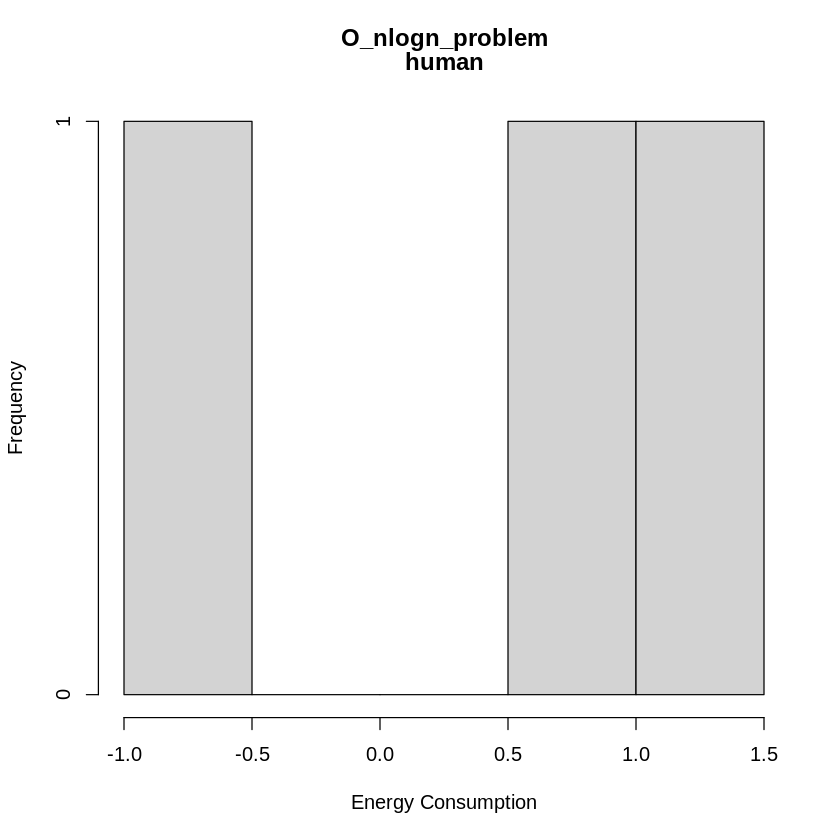

In [25]:
# Use bestNormalize package to normalize data

library(bestNormalize)
df$norm_energy_consumption = bestNormalize(df$energy_consumption)$x.t
df %>%
  group_by(problem, prompts) %>%
  group_split() %>%
  lapply(function(group_data) {
    hist(group_data$norm_energy_consumption,
         main = c(unique(group_data$problem), unique(group_data$prompts)),
         xlab = "Energy Consumption")
  })

# Conducting shapiro-test for normality test
df %>%
  group_by(problem, prompts) %>%
  summarize(n = n(),
            stest = shapiro.test(norm_energy_consumption)$p.value)

In [26]:
head(df)

__run_id,__done,run_number,problem,prompts,energy_consumption,execution_time,norm_energy_consumption
<chr>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
run_0_repetition_0,DONE,r1,O_n2_problem,human,5.536,0.009056,1.3526886
run_1_repetition_0,DONE,r1,O_n2_problem,base_prompt,7.389,0.020201,3.0444826
run_2_repetition_0,DONE,r1,O_n2_problem,few_shot_prompt,4.644,0.022137,-1.2165812
run_3_repetition_0,DONE,r1,O_n2_problem,guided_prompt,4.920,0.021532,-0.1670242
run_4_repetition_0,DONE,r1,O_n_problem,human,5.023,0.023125,0.1546360
run_5_repetition_0,DONE,r1,O_n_problem,base_prompt,4.704,0.021473,-0.9620545


In [ ]:
install.packages("lmerTest")

Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
library,0.008663554,0.008663554,1,26,0.2764627,6.034853e-01
dataframe_size,1.161773828,1.161773828,1,26,37.0733738,1.958917e-06
library:dataframe_size,0.039637571,0.039637571,1,26,1.2648748,2.710065e-01



	Shapiro-Wilk normality test

data:  resid(model)
W = 0.9647, p-value = 1.09e-06


[1] "We can see residuals are not normal,\nwhich might be the result that our data doesn't meet the conditional normality assumption,\neven though it's distribution with no regard to factors looks normal."

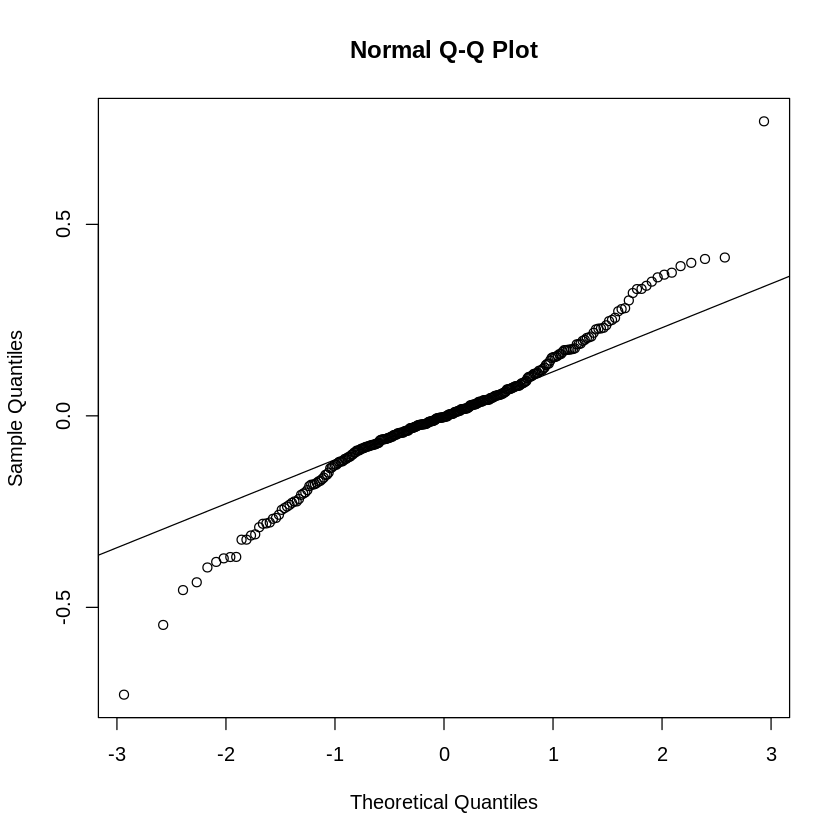

In [31]:
## Plotting QQLine and conduct shapiro test with lmerTest Package

library(lmerTest)
model = lmer(norm_energy_usage ~ library * dataframe_size + (1|trial), data = dat_data)
anova(model)


# We can investigate residuals of the mixed linear model with commands


qqnorm(resid(model))
qqline(resid(model))
shapiro.test(resid(model))

"We can see residuals are not normal,
which might be the result that our data doesn't meet the conditional normality assumption,
even though it's distribution with no regard to factors looks normal."

## Hypothesis Testing


*   For data follow normal distribution (Parameters Test)


    1.	T-test: Assesses whether the means of two groups are statistically different from each other.
	2.	ANOVA (Analysis of Variance): Compares the means of three or more groups.
	3.	Pearson Correlation: Measures the linear relationship between two continuous variables.
	4.	Linear Regression: Predicts a dependent variable based on one or more independent variables.


*   For data doesn't follow normal distribution (non-parametric tests,)


    1.	Mann-Whitney U Test: A non-parametric equivalent of the t-test for two independent groups.
	2.	Kruskal-Wallis Test: A non-parametric alternative to ANOVA.
	3.	Spearman’s Rank Correlation: A non-parametric measure of the strength and direction of association between two variables.
	4.	Wilcoxon Signed-Rank Test: Used for paired or related samples to compare differences when the assumptions of a paired t-test are not met.





In [32]:
## Non-parametric tests - Wilcoxon test
# Used for comparing two related samples, matched samples, or repeated measurements.

pandas_small = dat_data[dat_data$dataframe_size == 'Small' & dat_data$library == 'Pandas',]$energy_usage
polars_small = dat_data[dat_data$dataframe_size == 'Small' & dat_data$library == 'Polars',]$energy_usage
wilcox.test(pandas_small, polars_small)

pandas_big = dat_data[dat_data$dataframe_size == 'Big' & dat_data$library == 'Pandas',]$energy_usage
polars_big = dat_data[dat_data$dataframe_size == 'Big' & dat_data$library == 'Polars',]$energy_usage
wilcox.test(pandas_big, polars_big)



	Wilcoxon rank sum test with continuity correction

data:  pandas_small and polars_small
W = 2562, p-value = 0.6422
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  pandas_big and polars_big
W = 4399, p-value = 4.313e-05
alternative hypothesis: true location shift is not equal to 0


In [28]:
install.packages("ARTool")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘estimability’, ‘mvtnorm’, ‘lme4’, ‘car’, ‘emmeans’




In [29]:
# parametric tests - ANOVA
# ANOVA (Analysis of Variance): Used to compare the means of three or more groups.

library(ARTool)

model = art(energy_usage ~ library * dataframe_size + Error(trial), data = dat_data)
anova(model)

'
To check if model is correct we simpy run command
summary(model)
and investigate whether all F-values are 0.
'


,Term,Error,Df,Df.res,Sum Sq,Sum Sq.res,Mean Sq,F value,Pr(>F)
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,library,trial,1,26,575181.7,1535959,575181.7,9.736411,0.0043860796
2,dataframe_size,trial,1,26,945000.0,1257992,945000.0,19.531119,0.0001555834
3,library:dataframe_size,trial,1,26,641830.1,1499731,641830.1,11.127047,0.0025681784


[1] "\nTo check if model is correct we simpy run command\nsummary(model)\nand investigate whether all F-values are 0.\n\nanova(model) shows us information about influence of each variable and their interactions."